In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import json

In [2]:
mapper = yaml.safe_load(open('plot_mapper.yml'))
models = yaml.safe_load(open('../score.yml'))['models']
lang_fam_map = mapper['lang_family_dict']
lang_list = list(lang_fam_map.keys())

model_name_map = mapper['model_name_dict']

ACCURACY_OE_PATH = '../json/{model}_accuracy_oe{oe_mode}.json'

In [3]:
d = []

for model in models:
    acc_oe_single = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='')))
    acc_oe_dual = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_dual')))
    acc_oe_multi = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_multi')))


    for task in ['1a. Dish Name (No-Context)', '1b. Dish Name (Contextualized)', '1c. Dish Name (Adversarial)', '2. Regional Cuisine']:
        d.append({
            'model': model,
            'task': task.split('.')[0],
            'acc_oe_single': acc_oe_single[task]['avg_score'],
            'acc_oe_dual': acc_oe_dual[task]['avg_score'],
            'acc_oe_multi': acc_oe_multi[task]['avg_score'],
        })

In [15]:
df = pd.DataFrame(d)
df['model'] = df['model'].map(model_name_map)
df[40:61]

,model,task,acc_oe_single,acc_oe_dual,acc_oe_multi
40,Aria 25B,1a,3.98,4.63,4.99
41,Aria 25B,1b,7.39,8.44,9.17
42,Aria 25B,1c,2.76,3.10,3.39
43,Aria 25B,2,13.82,15.29,16.20
44,Phi-3.5 Vision 4B,1a,1.93,2.60,2.91
45,Phi-3.5 Vision 4B,1b,2.91,3.97,4.23
46,Phi-3.5 Vision 4B,1c,1.34,1.78,2.07
47,Phi-3.5 Vision 4B,2,7.58,8.93,9.22
48,Pixtral 12B,1a,0.99,1.11,1.22
49,Pixtral 12B,1b,2.49,2.73,2.94


In [17]:
df_model = df.groupby('model', sort=False).mean(numeric_only=True).reset_index()

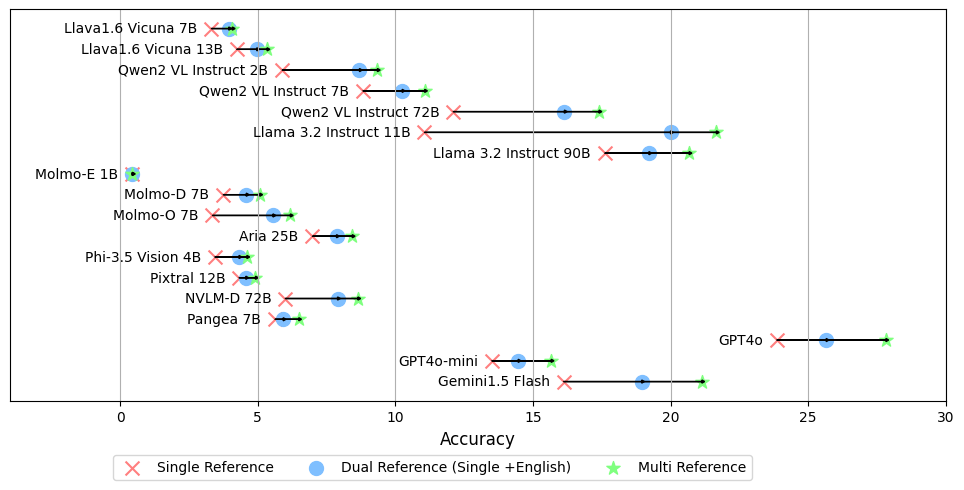

In [39]:
models = df_model['model'].to_list()[::-1]
single = df_model['acc_oe_single'].to_list()[::-1]
dual = df_model['acc_oe_dual'].to_list()[::-1]
multi = df_model['acc_oe_multi'].to_list()[::-1]

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(single, models, color='#FF7F7F', marker='x', label='Single Reference', s=100)
ax.scatter(dual, models, color='#7FBFFF', marker='o', label='Dual Reference (Single +English)', s=100)
ax.scatter(multi, models, color='#7FFF7F', marker='*', label='Multi Reference', s=100)
for i in range(len(models)):
    ax.arrow(single[i], i, dual[i] - single[i], 0, head_width=0.15, head_length=0.1, fc='black', ec='black')
    ax.arrow(dual[i], i, multi[i] - dual[i], 0, head_width=0.15, head_length=0.1, fc='black', ec='black')

for i, model in enumerate(models):
    ax.text(single[i]-0.5, i, model, fontsize=10, ha='right', va='center')

ax.set_xlabel('Accuracy', fontsize=12)
plt.yticks([], visible=False) 
plt.xlim(-4, 30)
plt.legend(bbox_to_anchor=(0.8, -0.12), ncol=3)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("model_connected_scatter.png", dpi=300)
plt.show()

In [42]:
df_task = df.groupby('task').mean(numeric_only=True).reset_index()

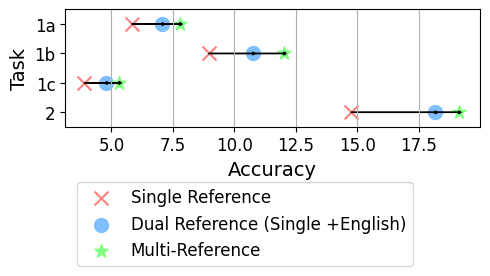

In [44]:
task = ['1a', '1b', '1c', '2'][::-1]
single = df_task['acc_oe_single'].to_list()[::-1]
dual = df_task['acc_oe_dual'].to_list()[::-1]
multi = df_task['acc_oe_multi'].to_list()[::-1]

fig, ax = plt.subplots(figsize=(5, 2))

ax.scatter(single, task, color='#FF7F7F', marker='x', label='Single Reference', s=100)
ax.scatter(dual, task, color='#7FBFFF', marker='o', label='Dual Reference (Single +English)', s=100)
ax.scatter(multi, task, color='#7FFF7F', marker='*', label='Multi-Reference', s=100)
for i in range(len(task)):
    ax.arrow(single[i], i, dual[i] - single[i], 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax.arrow(dual[i], i, multi[i] - dual[i], 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

ax.set_xlabel('Accuracy', fontsize=14)
ax.set_ylabel('Task', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-0.5, len(task) - 0.5)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("task_connectedscatter.png", dpi=300)
plt.show()